The Pandas I/O API is a set of top level reader functions accessed liken pandas.read_csv() tha returns a pandas object.The corresponding writer functions like Dataframe.to_csv()


In [63]:
import pandas as pd
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
import io

data = "col1, col2,col3\na,b,1\na,b,2\nc,d,3"
pd.read_csv(StringIO(data))

pd.read_csv(StringIO(data), usecols=lambda x: x.upper() in ["COL1", "COL3"])

data2 = "a,b,c,d\n1,2,3,4\n5,6,7,8\n9,10,11"
print(data2,'\n')

data3 = "2,3,4,5\n65,6,7\n7,8,9,9"
#print(data3)
df = pd.read_csv(StringIO(data3), dtype=object)
# pd.read_csv(StringIO(data3))
#accessing the values and elements
df2 = pd.read_csv(StringIO(data2), dtype=object)
print(df2)
df2['a'][0]
df2['d'][2]
df2['c'][2]

a,b,c,d
1,2,3,4
5,6,7,8
9,10,11 

   a   b   c    d
0  1   2   3    4
1  5   6   7    8
2  9  10  11  NaN


'11'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


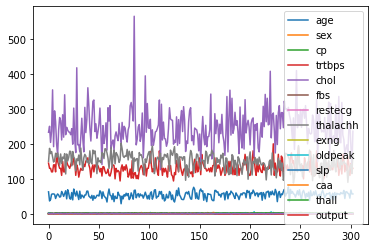

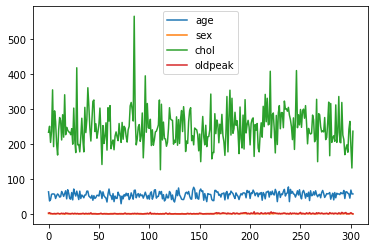

In [59]:
#loading real data inform a csv file
heart = pd.read_csv('heart.csv')
heart
heart.info()
heart.describe()
heart.columns.str.upper()
heart.dtypes
heart.plot()
heart.sex.plot()
heart[['sex', 'age']].mean()
heart[['sex', 'age']].median()
heart[['sex', 'age','cp']].max()
heart[['sex', 'age']].min()
heart[['sex', 'age']].skew()
heart[['sex', 'age']].kurt()
heart[['sex', 'age']].cumsum().head(20)

heart2 = pd.read_csv('heart.csv', dtype='category').dtypes
heart2

heart3 = pd.read_csv('heart.csv', usecols=['age', 'sex','chol','oldpeak'])  #selecting specific columns to use in the data
heart3
heart3.plot()

#print(open('heart.csv').read())
#If there are comments one can suppress them using the comment keyword:
heart3 = pd.read_csv('heart.csv', comment='#')
heart
#finding any extra columns or delimeters
heart3 = pd.read_csv('heart.csv', index_col=False, encoding='utf-8')
heart3

Date handling

In [64]:
data = pd.read_csv('heart.csv', parse_dates=True)
data
data.index
# data = pd.read_csv('heart.csv', parse_dates= pd.to_datetime)
# data


RangeIndex(start=0, stop=303, step=1)

Writing CSVs to binary file objects


df.to_csv(..., mode='wb') allows one to write a csv file into a binary mode.

In [69]:
data = pd.DataFrame([2,3,4,5,6,8])
buffer = io.BytesIO()
#data.to_csv(buffer, encoding='utf-8', compression='gzip')
#how to pass the data with thousandas::
# df = pd.read_csv('president.csv', sep='|', thousands=",")
# df
